<font size="5">**Police Officer Attdence Prediction**</font>



Author: Kai Chen

Date: April, 2020



<font size="4">**Introduction**</font>

This notebook contains my solution of analyzing the road accident safety data found at https://data.gov.uk/dataset/road-accidents-safety- .

- This analysis includes a model that predicts if a police officer is likely to attend an accident or not.

- The analysis focuses initially only on the accidents from the 2017 dataset.

- The notebook summarizes my initial findings. 

- This is not an exercise that develops a final solution – more of first iteration.

- The notebook describes how I might design and implement for a long term approach a data infrastructure for processing all additional data (large amount including all available years) given the desired use case above. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-the-data" data-toc-modified-id="Getting-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Converting-column-'Date'-into-the-python-date-time-format" data-toc-modified-id="Converting-column-'Date'-into-the-python-date-time-format-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Converting column 'Date' into the python date time format</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handling missing values</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Plot-number-of-accidents-per-month" data-toc-modified-id="Plot-number-of-accidents-per-month-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot number of accidents per month</a></span></li><li><span><a href="#Show-number-of-accidents-in-each-week-day" data-toc-modified-id="Show-number-of-accidents-in-each-week-day-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Show number of accidents in each week day</a></span><ul class="toc-item"><li><span><a href="#Plot-number-of-accidents-in-the-weekdays-of-each-month" data-toc-modified-id="Plot-number-of-accidents-in-the-weekdays-of-each-month-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Plot number of accidents in the weekdays of each month</a></span></li></ul></li><li><span><a href="#How-weather-affects-the-number-of-accidents?" data-toc-modified-id="How-weather-affects-the-number-of-accidents?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>How weather affects the number of accidents?</a></span></li><li><span><a href="#Percentage-of-each-category-of-accident-severity" data-toc-modified-id="Percentage-of-each-category-of-accident-severity-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Percentage of each category of accident severity</a></span><ul class="toc-item"><li><span><a href="#Number-of-fatalities-over-the-months?" data-toc-modified-id="Number-of-fatalities-over-the-months?-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Number of fatalities over the months?</a></span></li></ul></li><li><span><a href="#Number-of-accidents-throughout-the-day" data-toc-modified-id="Number-of-accidents-throughout-the-day-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Number of accidents throughout the day</a></span><ul class="toc-item"><li><span><a href="#Number-of-accidents-through-the-time" data-toc-modified-id="Number-of-accidents-through-the-time-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Number of accidents through the time</a></span></li></ul></li><li><span><a href="#Statistics-of-Vehicles" data-toc-modified-id="Statistics-of-Vehicles-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Statistics of Vehicles</a></span><ul class="toc-item"><li><span><a href="#Sex-and-Age-Band" data-toc-modified-id="Sex-and-Age-Band-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Sex and Age Band</a></span></li><li><span><a href="#Manoeuvre" data-toc-modified-id="Manoeuvre-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Manoeuvre</a></span></li></ul></li></ul></li><li><span><a href="#Predicting-Police-Officer-Attendance" data-toc-modified-id="Predicting-Police-Officer-Attendance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predicting Police Officer Attendance</a></span><ul class="toc-item"><li><span><a href="#Merging-the-data" data-toc-modified-id="Merging-the-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Merging the data</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Preparing-the-target-variable" data-toc-modified-id="Preparing-the-target-variable-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Preparing the target variable</a></span></li><li><span><a href="#Splitting-the-dataset-into-train-and-test-sets" data-toc-modified-id="Splitting-the-dataset-into-train-and-test-sets-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Splitting the dataset into train and test sets</a></span></li><li><span><a href="#Evaluating-machine-learning-models" data-toc-modified-id="Evaluating-machine-learning-models-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Evaluating machine learning models</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Stacking</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#SHAP-feature-analysis" data-toc-modified-id="SHAP-feature-analysis-4.5.6"><span class="toc-item-num">4.5.6&nbsp;&nbsp;</span>SHAP feature analysis</a></span></li></ul></li></ul></li><li><span><a href="#System-Design" data-toc-modified-id="System-Design-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>System Design</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [299]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt
import seaborn as sns

import shap


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE

import lightgbm as lgbm

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


# Getting the data

In [6]:
data_folder = 'data'
file_cas = '../{}/Cas.csv'.format(data_folder)
file_acc = '../{}/Acc.csv'.format(data_folder)
file_veh = '../{}/Veh.csv'.format(data_folder)


In [7]:
df_acc = pd.read_csv(file_acc)
df_cas = pd.read_csv(file_cas)
df_veh = pd.read_csv(file_veh)


In [8]:
df_acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [9]:
df_acc.shape

(129982, 32)

In [10]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               129982 non-null  object 
 1   Location_Easting_OSGR                        129963 non-null  float64
 2   Location_Northing_OSGR                       129963 non-null  float64
 3   Longitude                                    129953 non-null  float64
 4   Latitude                                     129953 non-null  float64
 5   Police_Force                                 129982 non-null  int64  
 6   Accident_Severity                            129982 non-null  int64  
 7   Number_of_Vehicles                           129982 non-null  int64  
 8   Number_of_Casualties                         129982 non-null  int64  
 9   Date                                         129982 non-nul

In [11]:
df_cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,2017010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,2017010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


In [12]:
df_cas.shape

(170993, 16)

In [13]:
df_cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170993 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      170993 non-null  object
 1   Vehicle_Reference                   170993 non-null  int64 
 2   Casualty_Reference                  170993 non-null  int64 
 3   Casualty_Class                      170993 non-null  int64 
 4   Sex_of_Casualty                     170993 non-null  int64 
 5   Age_of_Casualty                     170993 non-null  int64 
 6   Age_Band_of_Casualty                170993 non-null  int64 
 7   Casualty_Severity                   170993 non-null  int64 
 8   Pedestrian_Location                 170993 non-null  int64 
 9   Pedestrian_Movement                 170993 non-null  int64 
 10  Car_Passenger                       170993 non-null  int64 
 11  Bus_or_Coach_Passenger              170

In [14]:
df_veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [15]:
df_veh.shape

(238926, 23)

In [16]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238926 entries, 0 to 238925
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    238926 non-null  object
 1   Vehicle_Reference                 238926 non-null  int64 
 2   Vehicle_Type                      238926 non-null  int64 
 3   Towing_and_Articulation           238926 non-null  int64 
 4   Vehicle_Manoeuvre                 238926 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  238926 non-null  int64 
 6   Junction_Location                 238926 non-null  int64 
 7   Skidding_and_Overturning          238926 non-null  int64 
 8   Hit_Object_in_Carriageway         238926 non-null  int64 
 9   Vehicle_Leaving_Carriageway       238926 non-null  int64 
 10  Hit_Object_off_Carriageway        238926 non-null  int64 
 11  1st_Point_of_Impact               238926 non-null  int64 
 12  Wa

# Preprocessing the data


## Converting column 'Date' into the python date time format


In [17]:
df_acc['Date'] = pd.to_datetime(df_acc['Date'], format="%d/%m/%Y")


In [18]:
df_acc['Date'].describe()

count                  129982
unique                    365
top       2017-12-01 00:00:00
freq                      559
first     2017-01-01 00:00:00
last      2017-12-31 00:00:00
Name: Date, dtype: object

In [19]:
df_acc[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    129982 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1015.6 KB


In [20]:
df_acc['Hour'] = df_acc['Time'].str[0:2]
df_acc['Hour'] = pd.to_numeric(df_acc['Hour'])
df_acc = df_acc.dropna(subset=['Hour'])
df_acc['Hour'] = df_acc['Hour'].astype('int')


- Morning Rush from 6am to 9am
- Office Hours from 9am to 4pm 
- Afternoon Rush from 4pm to 7pm 
- Evening from 7pm to 11pm 
- Night from 11pm to 6am 

**Reference**

https://www.bbc.com/news/uk-england-42917201


In [21]:

def get_time_group(hour):
    """
    This function turns the hours into daytime categories
    """
    if hour >= 6 and hour <= 9:
        return "morning rush (6-9)"
    elif hour > 9 and hour <= 16:
        return "office hours (9-16)"
    elif hour > 16 and hour <= 19:
        return "afternoon rush (16-19)"
    elif hour > 19 and hour <= 23:
        return "evening (19-23)"
    else:
        return "night (23-6)"
    
    

In [22]:
df_acc['TimeGroup'] = df_acc['Hour'].apply(get_time_group)

df_acc[['Time', 'Hour', 'TimeGroup']].head()


,Time,Hour,TimeGroup
0,03:12,3,night (23-6)
1,01:30,1,night (23-6)
2,00:30,0,night (23-6)
3,01:11,1,night (23-6)
4,01:42,1,night (23-6)


## Handling missing values

In [23]:
print('Percentage of Missing Values in Accidents:')
print(round(df_acc.isna().sum().sum()/len(df_acc), 3))


Percentage of Missing Values in Accidents:
0.056


In [24]:
print('Percentage of Missing Values (per column) in Accidents:')
print(round(df_acc.isna().sum()/len(df_acc), 3))


Percentage of Missing Values (per column) in Accidents:
Accident_Index                                 0.000
Location_Easting_OSGR                          0.000
Location_Northing_OSGR                         0.000
Longitude                                      0.000
Latitude                                       0.000
Police_Force                                   0.000
Accident_Severity                              0.000
Number_of_Vehicles                             0.000
Number_of_Casualties                           0.000
Date                                           0.000
Day_of_Week                                    0.000
Time                                           0.000
Local_Authority_(District)                     0.000
Local_Authority_(Highway)                      0.000
1st_Road_Class                                 0.000
1st_Road_Number                                0.000
Road_Type                                      0.000
Speed_limit                                

In [25]:
print('Percentage of Missing Values in Vehicles:')
print(round(df_veh.isna().sum().sum()/len(df_veh), 3))


Percentage of Missing Values in Vehicles:
0.0


In [26]:
print('Percentage of Missing Values in Casualties:')
print(round(df_cas.isna().sum().sum()/len(df_cas), 3))


Percentage of Missing Values in Casualties:
0.0


# Exploratory Data Analysis (EDA)


## Plot number of accidents per month

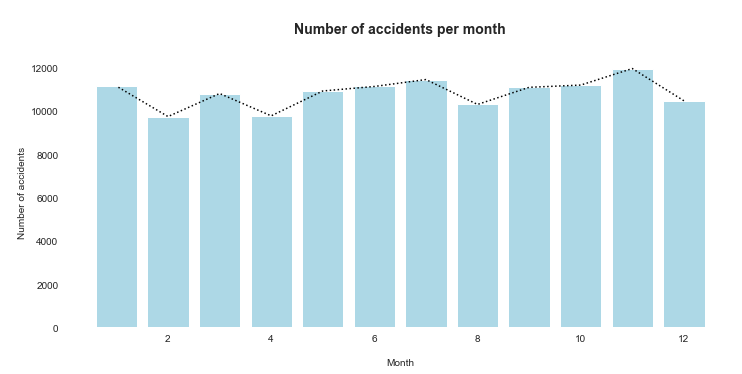

In [27]:
acc_monthly_count = df_acc['Date'].dt.month.value_counts().sort_index(ascending=False)

sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(acc_monthly_count.index, acc_monthly_count.values, color='lightblue')
ax.plot(acc_monthly_count, linestyle=':', color='black')
ax.set_title('\nNumber of accidents per month\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of accidents')
ax.set(xlabel='\nMonth')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


## Show number of accidents in each week day


In [28]:
acc_weekday_counts = pd.DataFrame(df_acc.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())

acc_weekday_counts.columns = ['Date', 'Count']

weekday = acc_weekday_counts['Date'].dt.day_name()
#weekday

acc_weekday_mean = pd.DataFrame(acc_weekday_counts.groupby(weekday)['Count'].mean().reset_index())
acc_weekday_mean.columns = ['Weekday', 'Mean_Accidents']
acc_weekday_mean.set_index('Weekday', inplace=True)
acc_weekday_mean


,Mean_Accidents
Weekday,
Friday,408.557692
Monday,344.923077
Saturday,331.269231
Sunday,282.547170
Thursday,380.711538
Tuesday,374.653846
Wednesday,371.500000


In [29]:
acc_weekday_mean[acc_weekday_mean['Mean_Accidents'] == acc_weekday_mean['Mean_Accidents'].max()].index


Index(['Friday'], dtype='object', name='Weekday')

In [30]:
acc_weekday_sum = pd.DataFrame(acc_weekday_counts.groupby(weekday)['Count'].sum().reset_index())
acc_weekday_sum.columns = ['Weekday', 'Sum_Accidents']
acc_weekday_sum.set_index('Weekday', inplace=True)
acc_weekday_sum


,Sum_Accidents
Weekday,
Friday,21245
Monday,17936
Saturday,17226
Sunday,14975
Thursday,19797
Tuesday,19482
Wednesday,19318


In [31]:
acc_weekday_sum[acc_weekday_sum['Sum_Accidents'] == acc_weekday_sum['Sum_Accidents'].max()].index


Index(['Friday'], dtype='object', name='Weekday')

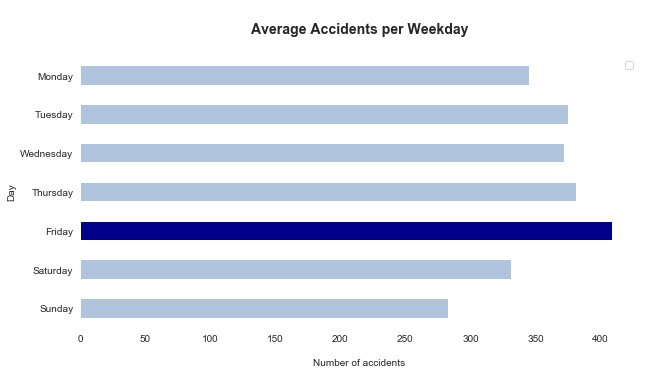

In [32]:

days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

max_acc_day = acc_weekday_mean[acc_weekday_mean['Mean_Accidents'] == acc_weekday_mean['Mean_Accidents'].max()].index.values[0]
colors = []
for day in days:
    if day == max_acc_day:
        colors.append('darkblue')
    else:
        colors.append('lightsteelblue')
        
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

acc_weekday_mean.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Day')
ax.legend('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


### Plot number of accidents in the weekdays of each month


In [33]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)


In [34]:
weekday = df_acc['Date'].dt.day_name()
month = df_acc['Date'].dt.month

acc_group = df_acc.groupby([month, weekday]).size()

acc_group = acc_group.rename_axis(['Month', 'Weekday']).unstack('Weekday').reindex(columns=days)
acc_group.style.apply(highlight_max)
#acc_group


Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Month,,,,,,,
1,1295,1298,1665,1663,1513,1905,1808
2,942,1208,1654,1478,1419,1557,1482
3,1056,1337,1943,1826,1821,1445,1377
4,1536,1685,1302,1362,1332,1380,1176
5,1183,1295,1671,1536,1887,1794,1556
6,1201,1397,1956,1932,1566,1568,1510
7,1581,1792,1642,1505,1540,1577,1812
8,1263,1230,1452,1710,1768,1682,1195
9,1184,1740,2232,1502,1483,1530,1420


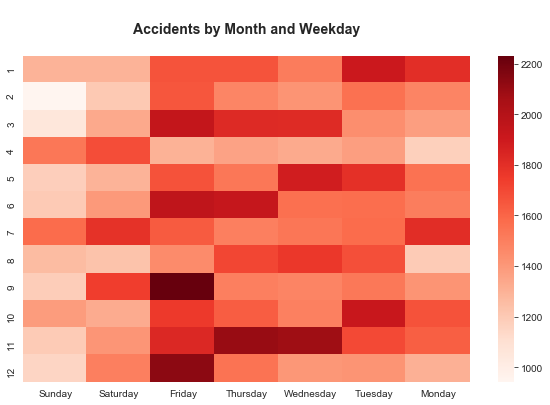

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(acc_group, cmap='Reds')
plt.title('\nAccidents by Month and Weekday\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');


## How weather affects the number of accidents?


Weather label

- 1	Fine no high winds
- 2	Raining no high winds
- 3	Snowing no high winds
- 4	Fine + high winds
- 5	Raining + high winds
- 6	Snowing + high winds
- 7	Fog or mist
- 8	Other
- 9	Unknown
- -1	Data missing or out of range!


In [36]:
df_acc[['Weather_Conditions']].describe()

,Weather_Conditions
count,129979.000000
mean,1.641488
std,1.843737
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [37]:
df_acc.Weather_Conditions.value_counts(normalize=True)


 1    0.805576
 2    0.110018
 9    0.035306
 8    0.020573
 4    0.009548
 5    0.008478
 3    0.004932
 7    0.004801
 6    0.000762
-1    0.000008
Name: Weather_Conditions, dtype: float64

## Percentage of each category of accident severity

accident severity

- 1	Fatal
- 2	Serious
- 3	Slight



In [38]:
df_acc['Accident_Severity'].value_counts()


3    105769
2     22534
1      1676
Name: Accident_Severity, dtype: int64

In [39]:
df_acc[['Accident_Severity']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129979 entries, 0 to 129981
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Accident_Severity  129979 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


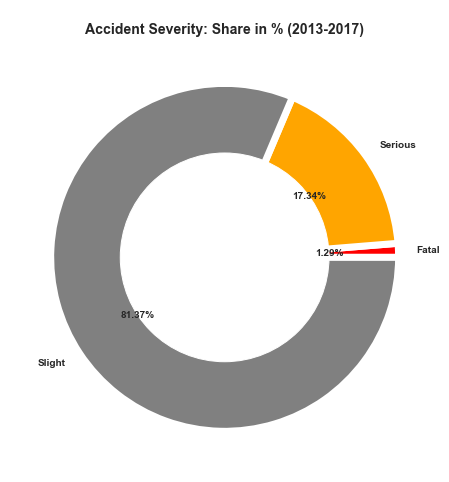

In [40]:

fatal   = df_acc.Accident_Severity.value_counts()[1]
serious = df_acc.Accident_Severity.value_counts()[2]
slight  = df_acc.Accident_Severity.value_counts()[3]

names = ['Fatal','Serious', 'Slight']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

plt.pie(x=size, labels=names, colors=['red', 'orange', 'gray'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()


### Number of fatalities over the months?


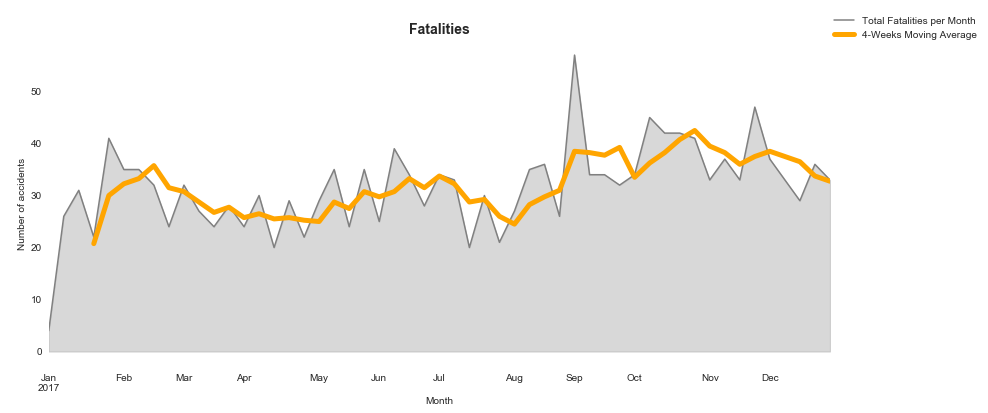

In [41]:

mask = df_acc['Accident_Severity']==1
df_weekly_fatalities = df_acc.loc[mask].set_index('Date').sort_index().resample('W').size()

sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

df_weekly_fatalities.plot(label='Total Fatalities per Month', color='gray', ax=ax)
plt.fill_between(x=df_weekly_fatalities.index, y1=df_weekly_fatalities.values, color='grey', alpha=0.3)
df_weekly_fatalities.rolling(window=4).mean().plot(color='orange', linewidth=5, label='4-Weeks Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of accidents', xlabel='Month')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


## Number of accidents throughout the day

### Number of accidents through the time

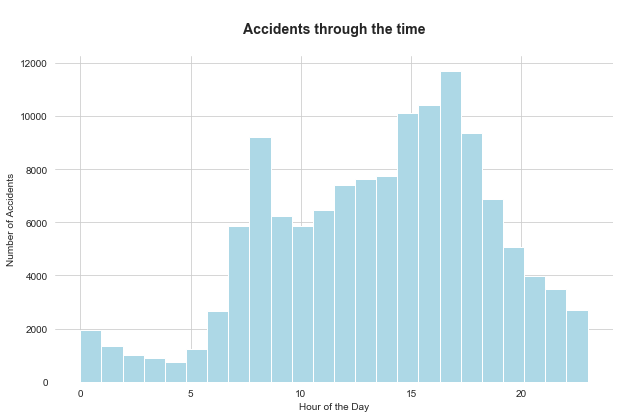

In [42]:

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))


df_acc.Hour.hist(bins=24, ax=ax, color='lightblue')
ax.set_title('\nAccidents through the time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


In [43]:
df_acc_counts = df_acc.groupby(['TimeGroup', 'Accident_Severity']).size()

df_acc_counts = df_acc_counts.rename_axis(['TimeGroup', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
df_acc_counts.style.apply(highlight_max)


Accident_Severity,fatal,serious,slight
TimeGroup,,,
afternoon rush (16-19),295,4924,22717
evening (19-23),261,2914,12060
morning rush (6-9),222,3702,20047
night (23-6),229,1616,5339
office hours (9-16),669,9378,45606


In [44]:
df_acc_counts['sum'] = df_acc_counts.sum(axis=1)
df_acc_counts = df_acc_counts.join(df_acc_counts.div(df_acc_counts['sum'], axis=0), rsuffix=' in %')

df_acc_counts_share = df_acc_counts.drop(columns=['fatal', 'serious', 'slight', 'sum', 'sum in %'], axis=1)
df_acc_counts_share.style.apply(highlight_max)


Accident_Severity,fatal in %,serious in %,slight in %
TimeGroup,,,
afternoon rush (16-19),0.010560,0.176260,0.813180
evening (19-23),0.017132,0.191270,0.791598
morning rush (6-9),0.009261,0.154437,0.836302
night (23-6),0.031876,0.224944,0.743179
office hours (9-16),0.012021,0.168508,0.819471


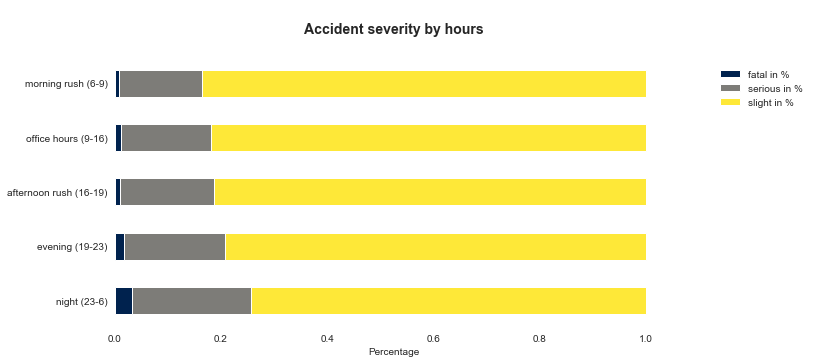

In [45]:

fig, ax = plt.subplots(figsize=(10, 5))

order = ['night (23-6)', 'evening (19-23)', 'afternoon rush (16-19)', 'office hours (9-16)', 'morning rush (6-9)']
df_acc_counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident severity by hours\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)


sns.despine(top=True, right=True, left=True, bottom=True);


## Statistics of Vehicles





### Sex and Age Band

Sex of driver
- 1	Male
- 2	Female
- 3	Not known
- -1	Data missing or out of range


Age band
- 1	0 - 5
- 2	6 - 10
- 3	11 - 15
- 4	16 - 20
- 5	21 - 25
- 6	26 - 35
- 7	36 - 45
- 8	46 - 55
- 9	56 - 65
- 10	66 - 75
- 11	Over 75
- -1	Data missing or out of range

In [46]:
def get_sex(row):
    if row['Sex_of_Driver'] == 1:
        val = 'Male'
    elif row['Sex_of_Driver'] == 2:
        val = 'Female'
    elif row['Sex_of_Driver'] == 3:
        val = 'Unknown'
    else:
        val = 'Data Missing'
    return val


def get_age_brand(row):
    age = row['Age_Band_of_Driver']
    if age == 1:
        val = '0-5'
    elif age == 2:
        val = '6-10'
    elif age == 3:
        val = '11-15'
    elif age == 4:
        val = '16-20'
    elif age == 5:
        val = '21-25'
    elif age == 6:
        val = '26-35'
    elif age == 7:
        val = '36-45'
    elif age == 8:
        val = '46-55'
    elif age == 9:
        val = '56-65'
    elif age == 10:
        val = '66-75'
    elif age == 11:
        val = 'Over 75'
    else:
        val = 'Data Missing'
    
    return val


In [47]:
df_veh['Sex_of_Driver_str'] = df_veh.apply(get_sex, axis=1)


In [48]:
df_veh.Sex_of_Driver_str.value_counts(normalize=True)


Male            0.644400
Female          0.272582
Unknown         0.083005
Data Missing    0.000013
Name: Sex_of_Driver_str, dtype: float64

In [49]:
df_veh['Age_Band_of_Driver_str'] = df_veh.apply(get_age_brand, axis=1)


In [50]:
df_veh.Age_Band_of_Driver_str.value_counts(normalize=True)


26-35           0.214083
36-45           0.168450
46-55           0.155341
Data Missing    0.116245
21-25           0.105146
56-65           0.089275
16-20           0.068754
66-75           0.044943
Over 75         0.027958
11-15           0.007860
6-10            0.001762
0-5             0.000184
Name: Age_Band_of_Driver_str, dtype: float64

In [51]:

df_drivers = df_veh.groupby(['Age_Band_of_Driver_str', 'Sex_of_Driver_str']).size().reset_index()


df_drivers.drop(df_drivers[(df_drivers['Age_Band_of_Driver_str'] == 'Data Missing') | 
                           (df_drivers['Sex_of_Driver_str'] == 'Data Missing') | 
                           (df_drivers['Sex_of_Driver_str'] == 'Unknown')].index, axis=0, inplace=True)

df_drivers.columns = ['Age_Band_of_Driver_str', 'Sex_of_Driver_str', 'Count']
df_drivers


,Age_Band_of_Driver_str,Sex_of_Driver_str,Count
0,0-5,Female,6
1,0-5,Male,38
2,11-15,Female,196
3,11-15,Male,1678
5,16-20,Female,4393
6,16-20,Male,11858
8,21-25,Female,7847
9,21-25,Male,17141
11,26-35,Female,15425
12,26-35,Male,34951


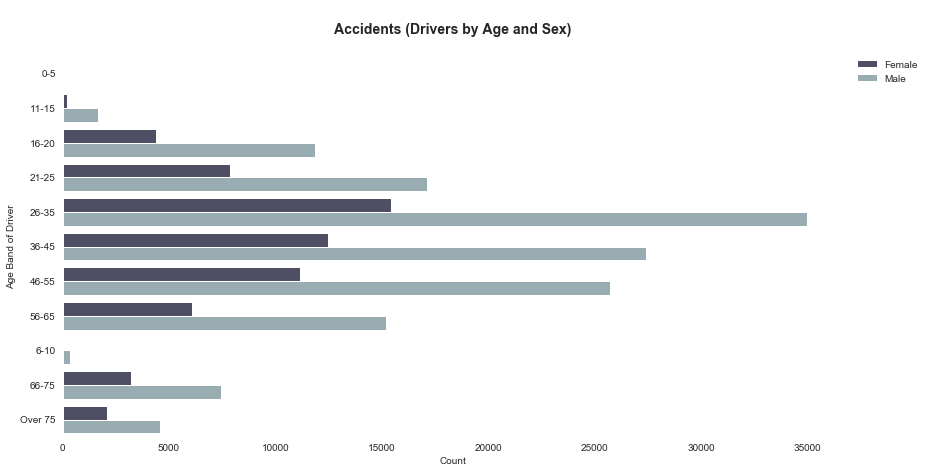

In [52]:

fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver_str', x='Count', hue='Sex_of_Driver_str', data=df_drivers, palette='bone')
ax.set_title('\nAccidents (Drivers by Age and Sex)\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)


sns.despine(top=True, right=True, left=True, bottom=True);


In [53]:
df_veh.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Sex_of_Driver_str', 'Age_Band_of_Driver_str'],
      dtype='object')

### Manoeuvre



- 1	Reversing
- 2	Parked
- 3	Waiting to go - held up
- 4	Slowing or stopping
- 5	Moving off
- 6	U-turn
- 7	Turning left
- 8	Waiting to turn left
- 9	Turning right
- 10	Waiting to turn right
- 11	Changing lane to left
- 12	Changing lane to right
- 13	Overtaking moving vehicle - offside
- 14	Overtaking static vehicle - offside
- 15	Overtaking - nearside
- 16	Going ahead left-hand bend
- 17	Going ahead right-hand bend
- 18	Going ahead other
- -1	Data missing or out of range


In [54]:
def get_manoeuvre(row):
    age = row['Vehicle_Manoeuvre']
    if age == 1:
        val = 'Reversing'
    elif age == 2:
        val = 'Parked'
    elif age == 3:
        val = 'Waiting to go - held up'
    elif age == 4:
        val = 'Slowing or stopping'
    elif age == 5:
        val = 'Moving off'
    elif age == 6:
        val = 'U-turn'
    elif age == 7:
        val = 'Turning left'
    elif age == 8:
        val = 'Waiting to turn left'
    elif age == 9:
        val = 'Turning right'
    elif age == 10:
        val = 'Waiting to turn right'
    elif age == 11:
        val = 'Changing lane to left'
    elif age == 12:
        val = 'Changing lane to right'
    elif age == 13:
        val = 'Overtaking moving vehicle - offside'
    elif age == 14:
        val = 'Overtaking static vehicle - offside'
    elif age == 15:
        val = 'Overtaking - nearside'
    elif age == 16:
        val = 'Going ahead left-hand bend'
    elif age == 17:
        val = 'Going ahead right-hand bend'
    elif age == 18:
        val = 'Going ahead other'
    else:
        val = 'Data Missing'
    
    return val


In [55]:
df_veh['Vehicle_Manoeuvre_str'] = df_veh.apply(get_manoeuvre, axis=1)


In [56]:
# prepare dataframe
df_veh_manoeuvre = df_veh.groupby('Vehicle_Manoeuvre_str').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
                                                        
#df_veh_manoeuvre = df_veh_manoeuvre[df_veh_manoeuvre.counts > 80000]
df_veh_manoeuvre


,Vehicle_Manoeuvre_str,counts
4,Going ahead other,114183
14,Turning right,22259
12,Slowing or stopping,17133
16,Waiting to go - held up,14214
6,Moving off,11688
10,Parked,9881
5,Going ahead right-hand bend,7964
13,Turning left,7866
3,Going ahead left-hand bend,6939
8,Overtaking moving vehicle - offside,4503


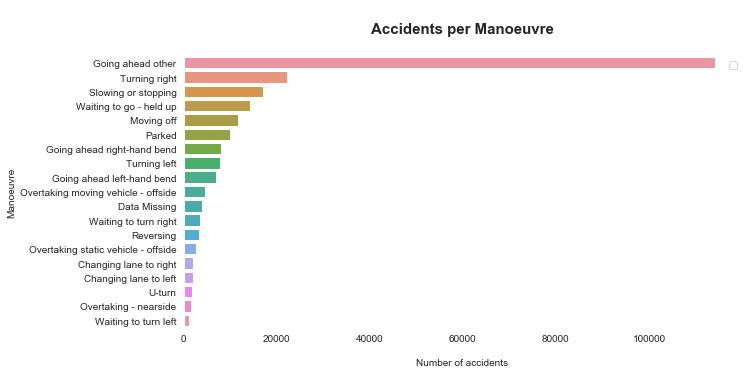

In [57]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


sns.barplot(x="counts", y="Vehicle_Manoeuvre_str", data=df_veh_manoeuvre)

#df_veh_manoeuvre.plot(kind='barh', ax=ax)
ax.set_title('\nAccidents per Manoeuvre\n', fontsize=15, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Manoeuvre')
ax.legend('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


# Predicting Police Officer Attendance


## Merging the data


In [112]:
df_veh_acc = pd.merge(df_acc, df_veh, on='Accident_Index')


In [113]:
df_veh_acc.info()    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205624 entries, 0 to 205623
Data columns (total 59 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               205624 non-null  object        
 1   Location_Easting_OSGR                        205590 non-null  float64       
 2   Location_Northing_OSGR                       205590 non-null  float64       
 3   Longitude                                    205574 non-null  float64       
 4   Latitude                                     205574 non-null  float64       
 5   Police_Force                                 205624 non-null  int64         
 6   Accident_Severity                            205624 non-null  int64         
 7   Number_of_Vehicles                           205624 non-null  int64         
 8   Number_of_Casualties                         205624 non-null  in

In [114]:
df_veh_acc.isna().sum()


Accident_Index                                     0
Location_Easting_OSGR                             34
Location_Northing_OSGR                            34
Longitude                                         50
Latitude                                          50
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

## Feature engineering


- Encoding 'TimeGroup' into integer

In [ ]:
le_timegroup = preprocessing.LabelEncoder()
df_veh_acc['TimeGroup'] = le_time.fit_transform(df_veh_acc['TimeGroup'].values)


In [ ]:
df_veh_acc['TimeGroup']


* Police_Force


In [349]:
df_veh_acc['Police_Force'].value_counts()


1     42931
20    10775
46     9085
13     8100
6      7656
44     7555
45     6807
4      6159
97     5731
47     5241
14     5230
31     4485
16     4268
10     4266
43     4079
7      4065
5      3944
22     3899
35     3768
21     3537
12     3359
36     3286
32     3278
33     3143
62     3129
30     3030
95     2974
55     2920
37     2888
40     2858
23     2654
54     2474
3      2289
63     2289
34     2040
11     1927
60     1761
53     1308
17     1266
61     1175
93      813
92      797
96      755
91      614
94      565
98      418
48       33
Name: Police_Force, dtype: int64

* Encode 'Local_Authority_(District)'


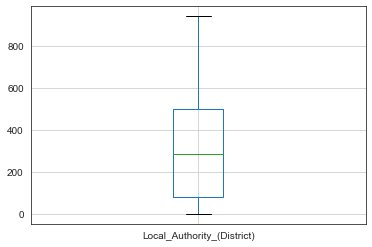

In [311]:
df_veh_acc['Local_Authority_(District)'].plot.box(grid='True')


In [312]:
# arguments in bins parameter denote left edge of each bin
df_veh_acc['Local_Authority_(District)_bin'] = np.digitize(df_veh_acc['Local_Authority_(District)'], 
                                                           bins=[1, 100, 200, 300, 400, 500])

# convert into categorical column
df_veh_acc['Local_Authority_(District)_bin'] = df_veh_acc['Local_Authority_(District)_bin'].astype('category')

# check the count within each bucket
df_veh_acc['Local_Authority_(District)_bin'].value_counts().sort_index()


1    56202
2    21273
3    28954
4    30519
5    18143
6    50533
Name: Local_Authority_(District)_bin, dtype: int64

* Local_Authority_(Highway)

In [314]:
len(set(df_veh_acc['Local_Authority_(Highway)'].values))

193

In [316]:
le_lah = preprocessing.LabelEncoder()
df_veh_acc['Local_Authority_(Highway)_encode'] = le_lah.fit_transform(df_veh_acc['Local_Authority_(Highway)'].values)


In [318]:
df_veh_acc['Local_Authority_(Highway)_encode'].count


<bound method Series.count of 0          91
1          91
2         114
3         114
4         111
         ... 
205619    140
205620    140
205621    140
205622    140
205623    140
Name: Local_Authority_(Highway)_encode, Length: 205624, dtype: int64>

* 1st_Road_Class

In [320]:
df_veh_acc['1st_Road_Class'].count


<bound method Series.count of 0         3
1         3
2         3
3         3
4         3
         ..
205619    2
205620    2
205621    3
205622    4
205623    4
Name: 1st_Road_Class, Length: 205624, dtype: int64>

* Road_Type

In [324]:
df_veh_acc['Road_Type'].count


<bound method Series.count of 0         6
1         6
2         6
3         6
4         6
         ..
205619    3
205620    3
205621    6
205622    6
205623    6
Name: Road_Type, Length: 205624, dtype: int64>

In [325]:
set(df_veh_acc['Road_Type'].values)


{1, 2, 3, 6, 7, 9}

* Junction_Detail

In [326]:
df_veh_acc['Junction_Detail']


0         0
1         0
2         3
3         3
4         3
         ..
205619    5
205620    5
205621    0
205622    3
205623    3
Name: Junction_Detail, Length: 205624, dtype: int64

In [327]:
set(df_veh_acc['Junction_Detail'].values)


{-1, 0, 1, 2, 3, 5, 6, 7, 8, 9}

In [337]:
df_veh_acc['Junction_Detail'].value_counts()


 0    83133
 3    62275
 6    21068
 1    16946
 9     7338
 8     5489
 5     3579
 7     2546
 2     2345
-1      905
Name: Junction_Detail, dtype: int64

* Junction_Control   


In [338]:
set(df_veh_acc['Junction_Control'].values)


{-1, 1, 2, 3, 4}

In [339]:

df_veh_acc['Junction_Control'].value_counts()


 4    94205
-1    86192
 2    23192
 3     1321
 1      714
Name: Junction_Control, dtype: int64

* 2nd_Road_Class


In [340]:
df_veh_acc['2nd_Road_Class'].value_counts()


 6    84170
-1    83308
 3    20786
 5     7982
 4     7850
 1     1324
 2      204
Name: 2nd_Road_Class, dtype: int64

* Pedestrian_Crossing-Human_Control

In [342]:
df_veh_acc['Pedestrian_Crossing-Human_Control'].value_counts()


 0    199266
-1      3904
 2      1808
 1       646
Name: Pedestrian_Crossing-Human_Control, dtype: int64

* Pedestrian_Crossing-Physical_Facilities

In [343]:
df_veh_acc['Pedestrian_Crossing-Physical_Facilities'].value_counts()


 0    163633
 5     14868
 4     11801
 1      6005
 8      4731
-1      4248
 7       338
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

* Light_Conditions

In [344]:
df_veh_acc['Light_Conditions'].value_counts()


 1    148167
 4     42417
 6      8938
 7      4654
 5      1446
-1         2
Name: Light_Conditions, dtype: int64

* Weather_Conditions


In [345]:
df_veh_acc['Weather_Conditions'].value_counts()


 1    166818
 2     22091
 9      7029
 8      4103
 4      1946
 5      1522
 3       997
 7       960
 6       156
-1         2
Name: Weather_Conditions, dtype: int64

* Road_Surface_Conditions 

In [346]:
df_veh_acc['Road_Surface_Conditions'].value_counts()


 1    148108
 2     50584
 4      3219
-1      2912
 3       672
 5       129
Name: Road_Surface_Conditions, dtype: int64

* Special_Conditions_at_Site

In [347]:
df_veh_acc['Special_Conditions_at_Site'].value_counts()


 0    197979
-1      3295
 4      2391
 1       513
 7       434
 6       382
 3       260
 5       250
 2       120
Name: Special_Conditions_at_Site, dtype: int64

* Carriageway_Hazards


In [350]:
df_veh_acc['Carriageway_Hazards'].value_counts()


 0    198918
-1      3107
 2      1845
 7       544
 1       455
 3       439
 6       316
Name: Carriageway_Hazards, dtype: int64

* Urban_or_Rural_Area

In [351]:
df_veh_acc['Urban_or_Rural_Area'].value_counts()


1    139317
2     66289
3        18
Name: Urban_or_Rural_Area, dtype: int64

* LSOA_of_Accident_Location

In [352]:
df_veh_acc['LSOA_of_Accident_Location'].value_counts()


E01004736    229
E01002444    162
E01004689    157
E01033595    138
E01018648    133
            ... 
E01013911      1
E01024526      1
W01000582      1
E01028037      1
E01029875      1
Name: LSOA_of_Accident_Location, Length: 24896, dtype: int64

In [ ]:
le_lal = preprocessing.LabelEncoder()
df_veh_acc['LSOA_of_Accident_Location_encode'] = le_lal.fit_transform(df_veh_acc['LSOA_of_Accident_Location'].values)


- Define categorical columns


In [139]:
cat_cols = ['Accident_Severity', 
            'TimeGroup', 
            'Local_Authority_(District)',
            'Speed_limit', 
            'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 
            'Sex_of_Driver', 
            'Vehicle_Manoeuvre',
           ]

for col in cat_cols:    
    df_veh_acc[col] = df_veh_acc[col].astype('category')
    


- Define numerical columns


In [141]:

num_cols = ['Age_of_Vehicle', 'Engine_Capacity_(CC)']


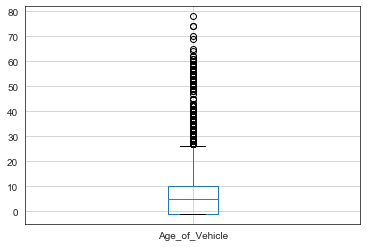

In [142]:
df_veh_acc[['Age_of_Vehicle']].plot.box(grid='True')
    

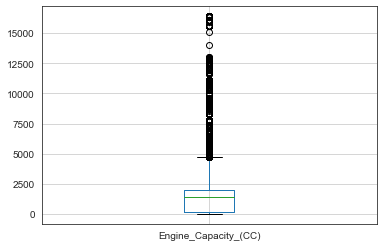

In [143]:

df_veh_acc[['Engine_Capacity_(CC)']].plot.box(grid='True')
   

In [144]:
df_veh_acc['Age_of_Vehicle'].describe()


count    205624.000000
mean          5.715033
std           5.985304
min          -1.000000
25%          -1.000000
50%           5.000000
75%          10.000000
max          78.000000
Name: Age_of_Vehicle, dtype: float64

In [145]:
len(set(df_veh_acc['Age_of_Vehicle'].values))


67

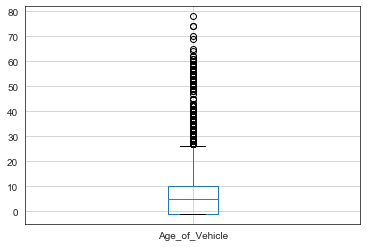

In [146]:
df_veh_acc[['Age_of_Vehicle']].plot.box(grid='True')


 **Encoding the 'age of vehicle' into bins**
 

In [147]:
age_of_vehicle_bins = {1: '1 to <2 years', 
                       2: '2 to <5 years', 
                       3: '5 to <10 years', 
                       4: '>=10 years'}


In [148]:
# arguments in bins parameter denote left edge of each bin
df_veh_acc['Age_of_Vehicle_bin'] = np.digitize(df_veh_acc['Age_of_Vehicle'], bins=[1,2,5,10])

# convert into categorical column
df_veh_acc['Age_of_Vehicle_bin'] = df_veh_acc['Age_of_Vehicle_bin'].astype('category')

# check the count within each bucket
df_veh_acc['Age_of_Vehicle_bin'].value_counts().sort_index()


0    53005
1    13941
2    34068
3    44346
4    60264
Name: Age_of_Vehicle_bin, dtype: int64

## Preparing the target variable

- 1	Yes
- 2	No
- 3	No - accident was reported using a self completion  form (self rep only)


In [149]:
#df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident'].describe()
#df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].plot.box(grid='True')

df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].count()


Did_Police_Officer_Attend_Scene_of_Accident    205624
dtype: int64

In [150]:
set(df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident'])


{1, 2, 3}

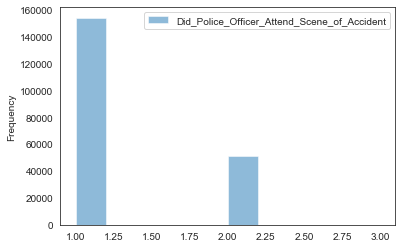

In [151]:
ax = df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].plot.hist(alpha=0.5)


In [152]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==1])


154198

In [153]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==2])


51410

In [154]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==3])


16

Remove the samples with 'Police Officer Attend' is 3. Because our objective is to predict if the policer attend the accident or not. On the other hand, there are only 16 samples with 'Police Officer Attend' equal to 3.


In [168]:
cols = cat_cols + num_cols + [target_col]
df_model = df_veh_acc[cols].copy()
df_model.shape


(205624, 10)

In [169]:
df_model = df_model[df_model[target_col] != 3]
df_model.shape


(205608, 10)

encode target variable 2 to 0

In [202]:
def encode_target(row):
    val = row[target_col]
    if val == 2:
        return 0
    return val


In [206]:
df_model[target_col] = df_model.apply(encode_target, axis=1)


In [207]:
df_model[target_col].value_counts(normalize=True)


1    0.749961
0    0.250039
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [208]:
df_model[target_col].value_counts(normalize=False)


1    154198
0     51410
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

## Splitting the dataset into train and test sets


In [209]:

X = df_model.drop([target_col], axis=1)

Y = df_model[[target_col]]


In [210]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


## Evaluating machine learning models


### RandomForest


* **Precision, Recall, F1-score**

In [211]:

model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf)

print(report_rf)


              precision    recall  f1-score   support

           0       0.52      0.29      0.37     10338
           1       0.79      0.91      0.85     30784

    accuracy                           0.76     41122
   macro avg       0.66      0.60      0.61     41122
weighted avg       0.72      0.76      0.73     41122



In [212]:
# 'f1_macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

cross_val_score(model_rf, X_train, y_train, scoring='f1_macro', n_jobs=-1, cv=3)
#cross_val_score(model_rf, X_train, y_train, n_jobs=-1, cv=3)



array([0.61652345, 0.61244724, 0.6153794 ])

* **Confusion matrix**

In [213]:
def plot_confusion_matrix(y_test, y_preds, class_names, columns=['Attend', 'Not Attend']):
    matrix = confusion_matrix(y_test, y_preds)

    #class_names = df_model.Did_Police_Officer_Attend_Scene_of_Accident.values
    dataframe = pd.DataFrame(matrix, index=columns, 
                             columns=columns)

    # create heatmap
    sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
    plt.show()
    

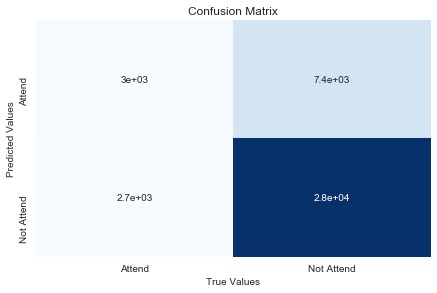

In [214]:
plot_confusion_matrix(y_test, y_pred_rf, df_model[target_col].values)


* **Compute the probability of a police officer attending the accident or not.**


In [215]:
y_pred_prob_rf = model_rf.predict_proba(X_test)


In [216]:
y_pred_prob_rf


array([[0.02      , 0.98      ],
       [0.084     , 0.916     ],
       [0.1       , 0.9       ],
       ...,
       [0.28490909, 0.71509091],
       [0.345     , 0.655     ],
       [0.14      , 0.86      ]])

* **Precision-Recall curve**


Reference

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



In [223]:
def plot_precision_recall_curve(y_test, y_pred_prob, classifier_name):
    average_precision = average_precision_score(y_test, y_pred_prob)
    average_precision = round(average_precision, 3)
    print('Average precision-recall score: {}'.format(average_precision))

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    print('Thresholds')
    print(thresholds)
    
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve ({}): AP={}'.format(classifier_name, average_precision))
    

Average precision-recall score: 0.834
Thresholds
[0.00000000e+00 6.66666667e-04 1.38609029e-03 ... 9.99000000e-01
 9.99583333e-01 1.00000000e+00]


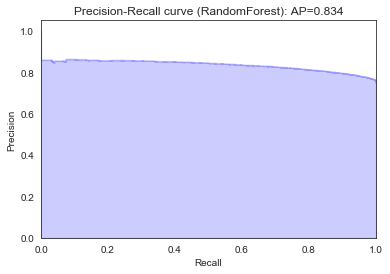

In [225]:
plot_precision_recall_curve(y_test, y_pred_prob_rf[:,-1], 'RandomForest')


* **ROC curve**


Reference

https://www.kaggle.com/learn-forum/53782

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



In [233]:
def plot_roc_curve(y_test, y_pred_prob, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    roc_auc = auc(fpr, tpr)
    roc_auc = round(roc_auc, 3)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {})'.format(classifier_name, roc_auc))


    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve ({})'.format(classifier_name), fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    

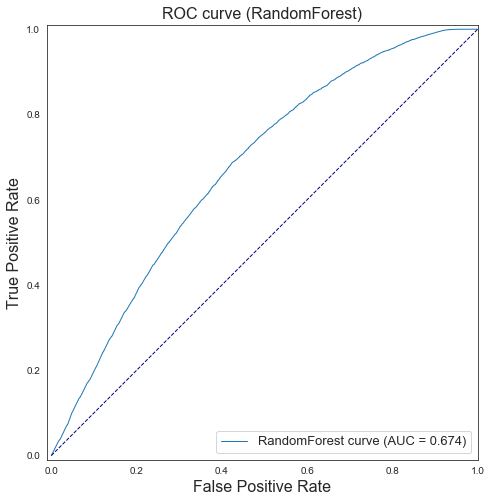

In [234]:
plot_roc_curve(y_test, y_pred_prob_rf[:,-1], 'RandomForest')


**Note**

- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.


- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.


- ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

I put roc curve here just for reference. For this task, we should use precision recall curve to monitor the performance.


**Reference**


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


### LightGBM


In [238]:
model_lgb = lgbm.LGBMClassifier(objective = 'binary', is_unbalance = True)

model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)

report_lgb = classification_report(y_test, y_pred_lgb)

print(report_lgb)


              precision    recall  f1-score   support

           0       0.72      0.24      0.36     10338
           1       0.79      0.97      0.87     30784

    accuracy                           0.79     41122
   macro avg       0.76      0.60      0.61     41122
weighted avg       0.77      0.79      0.74     41122



In [239]:
cross_val_score(model_lgb, X_train, y_train, scoring='f1_macro', n_jobs=-1, cv=3)


array([0.61822142, 0.6164362 , 0.61924747])

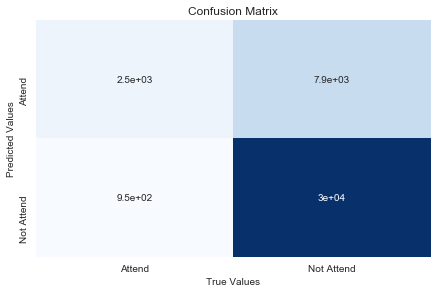

In [242]:
plot_confusion_matrix(y_test, y_pred_lgb, df_model[target_col].values)


In [243]:
y_pred_prob_lgb = model_lgb.predict_proba(X_test)


Average precision-recall score: 0.871
Thresholds
[0.00322277 0.00322334 0.00322551 ... 0.97209258 0.97226539 0.97756046]


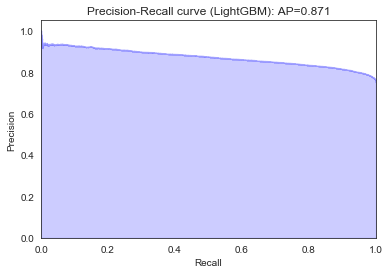

In [245]:
plot_precision_recall_curve(y_test, y_pred_prob_lgb[:,-1], 'LightGBM')


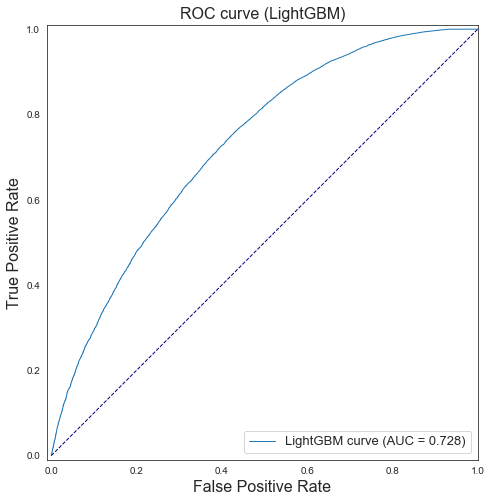

In [246]:
plot_roc_curve(y_test, y_pred_prob_lgb[:,-1], 'LightGBM')


### Hyperparameter tuning


**Reference**

https://lightgbm.readthedocs.io/en/latest/Parameters.html

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html


In [294]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

In [304]:
# https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}


gridParams = {
    'learning_rate': [0.005, 0.01, 0.1],
    'n_estimators': [40, 100, 500, 1000, 1500, 2000],
    'num_leaves': [6, 8, 12, 16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.2, 0.7, 0.9],
    'reg_alpha' : [0.5, 1, 1.2],
    'reg_lambda' : [0.5, 1, 1.2, 1.4],
    }

mdl = lgbm.LGBMClassifier(boosting_type= 'gbdt',
                          objective = 'binary',
                          is_unbalance = True,
                          #metric = 'binary_logloss',
                          metric = 'auc',
                          n_jobs = 3, 
                          silent = True,
                          max_depth = params['max_depth'],
                          max_bin = params['max_bin'],
                          subsample_for_bin = params['subsample_for_bin'],
                          subsample = params['subsample'],
                          subsample_freq = params['subsample_freq'],
                          min_split_gain = params['min_split_gain'],
                          min_child_weight = params['min_child_weight'],
                          min_child_samples = params['min_child_samples'],
                          scale_pos_weight = params['scale_pos_weight'],
                        )

mdl.get_params().keys()

model_lgb_randomcv = RandomizedSearchCV(mdl, 
                                        gridParams,
                                        verbose=1,
                                        cv=4,
                                        n_jobs=2,)

model_lgb_randomcv.fit(X_train, y_train)

report(model_lgb_randomcv.cv_results_)

print("\n Best params:\n", model_lgb_randomcv.best_params_)
   


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:  3.7min finished


Model with rank: 1
Mean validation score: 0.719 (std: 0.002)
Parameters: {'subsample': 0.9, 'reg_lambda': 1.4, 'reg_alpha': 0.5, 'random_state': 42, 'objective': 'binary', 'num_leaves': 8, 'n_estimators': 500, 'learning_rate': 0.01, 'colsample_bytree': 0.66, 'boosting_type': 'gbdt'}

Model with rank: 2
Mean validation score: 0.713 (std: 0.001)
Parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'random_state': 42, 'objective': 'binary', 'num_leaves': 12, 'n_estimators': 1000, 'learning_rate': 0.005, 'colsample_bytree': 0.65, 'boosting_type': 'gbdt'}

Model with rank: 3
Mean validation score: 0.706 (std: 0.000)
Parameters: {'subsample': 0.2, 'reg_lambda': 1.4, 'reg_alpha': 1, 'random_state': 42, 'objective': 'binary', 'num_leaves': 8, 'n_estimators': 1500, 'learning_rate': 0.005, 'colsample_bytree': 0.66, 'boosting_type': 'gbdt'}


 Best params:
 {'subsample': 0.9, 'reg_lambda': 1.4, 'reg_alpha': 0.5, 'random_state': 42, 'objective': 'binary', 'num_leaves': 8, 'n_estimators'

In [305]:
y_pred_lgb_randomcv = model_lgb_randomcv.predict(X_test)

y_pred_prob_lgb_randomcv = model_lgb_randomcv.predict_proba(X_test)

report_lgb_randomcv = classification_report(y_test, y_pred_lgb_randomcv)

print(report_lgb)


              precision    recall  f1-score   support

           0       0.72      0.24      0.36     10338
           1       0.79      0.97      0.87     30784

    accuracy                           0.79     41122
   macro avg       0.76      0.60      0.61     41122
weighted avg       0.77      0.79      0.74     41122



Average precision-recall score: 0.864
Thresholds
[0.08859908 0.09211975 0.09212419 ... 0.81095242 0.81290856 0.81700016]


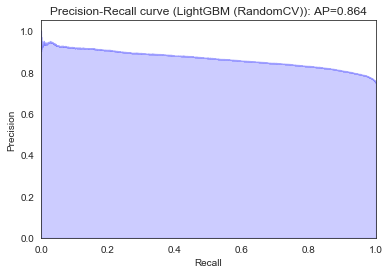

In [306]:
plot_precision_recall_curve(y_test, y_pred_prob_lgb_randomcv[:,-1], 'LightGBM (RandomCV)')


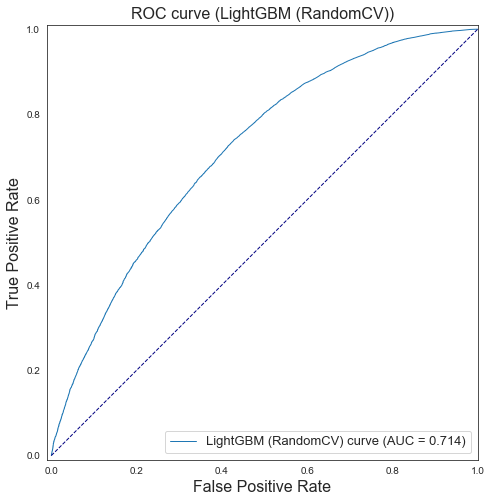

In [307]:
plot_roc_curve(y_test, y_pred_prob_lgb_randomcv[:,-1], 'LightGBM (RandomCV)')


### Stacking

In [266]:

y_pred_prob_stack = 0.7*y_pred_prob_lgb + 0.3*y_pred_prob_rf


Average precision-recall score: 0.866
Thresholds
[0.00225594 0.00225634 0.00225786 ... 0.9760981  0.98046481 0.98058577]


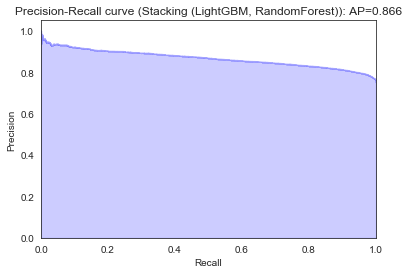

In [267]:
plot_precision_recall_curve(y_test, y_pred_prob_stack[:,-1], 'Stacking (LightGBM, RandomForest)')


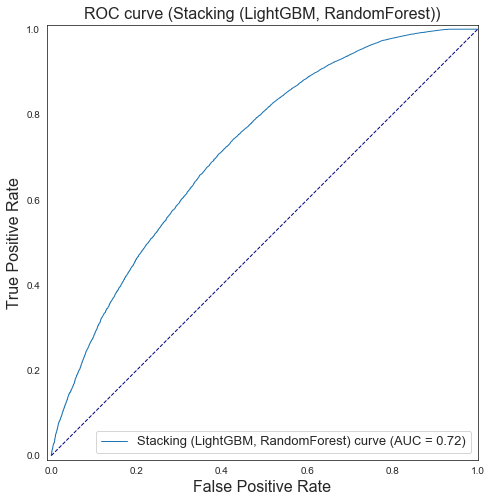

In [268]:
plot_roc_curve(y_test, y_pred_prob_stack[:,-1], 'Stacking (LightGBM, RandomForest)')


### SMOTE


**Reference**

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


In [269]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train.values, y_train.values)
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)


In [273]:
model_lgb_smote = lgbm.LGBMClassifier()

model_lgb_smote.fit(X_resampled, y_resampled)

y_pred_lgb_smote = model_lgb_smote.predict(X_test)

y_pred_prob_lgb_smote = model_lgb_smote.predict_proba(X_test)

report_lgb_smote = classification_report(y_test, y_pred_lgb_smote)
print(report_lgb_smote)


              precision    recall  f1-score   support

           0       0.76      0.19      0.30     10338
           1       0.78      0.98      0.87     30784

    accuracy                           0.78     41122
   macro avg       0.77      0.58      0.58     41122
weighted avg       0.78      0.78      0.73     41122



In [272]:
cross_val_score(model_lgb_smote, X_resampled, y_resampled, scoring='f1_macro', n_jobs=-1, cv=3)


array([0.55986523, 0.90579261, 0.90716481])

Average precision-recall score: 0.853
Thresholds
[0.00198898 0.00202909 0.00203377 ... 0.95630765 0.9568256  0.95964983]


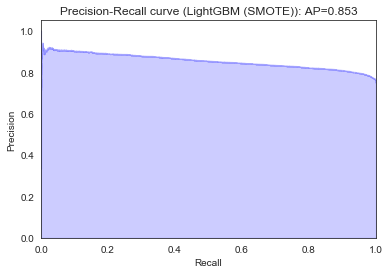

In [274]:
plot_precision_recall_curve(y_test, y_pred_prob_lgb_smote[:,-1], 'LightGBM (SMOTE)')


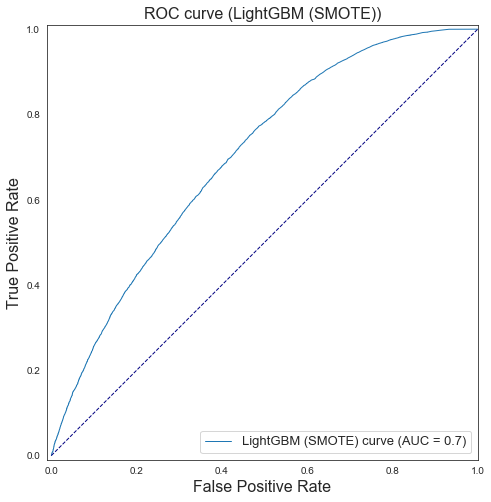

In [275]:
plot_roc_curve(y_test, y_pred_prob_lgb_smote[:,-1], 'LightGBM (SMOTE)')


### SHAP feature analysis


**Reference**

https://github.com/slundberg/shap


https://github.com/slundberg/shap/issues/367



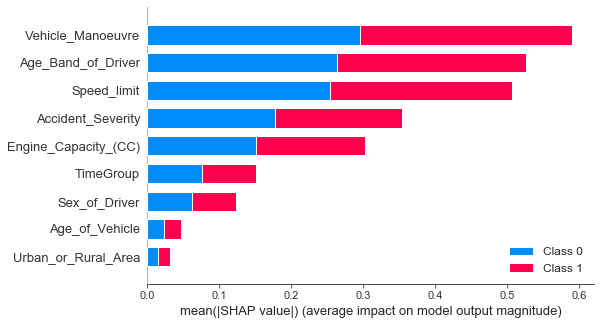

In [276]:
explainer = shap.TreeExplainer(model_lgb)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)



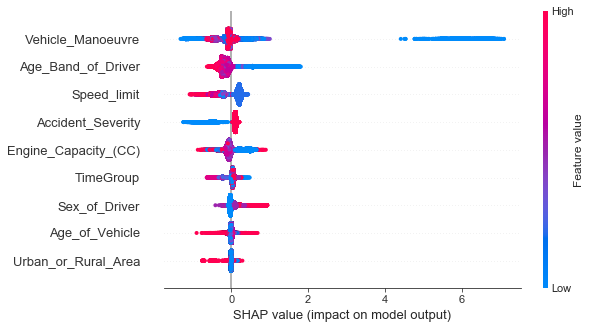

In [283]:
shap.summary_plot(shap_values[0], X_train)


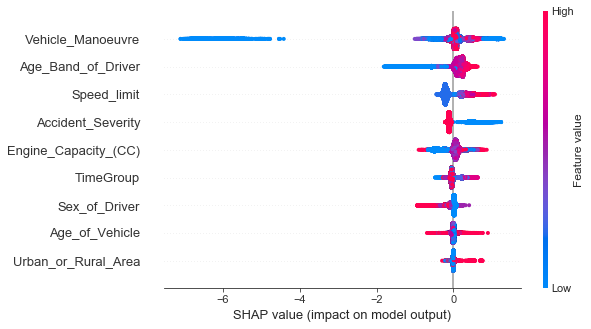

In [284]:
shap.summary_plot(shap_values[1], X_train)


# System Design


# Conclusion